# Position of a quasar

The position of a quasar could be estimated through instruments as GAIA. The measurement, however, is not free from errors. 

In the first case we suppose we have measurements of the position of a quasar with homoscedastic uncertainties to simulate for example the case in which the error of the instrument we are using is the main one. 

### Gaussians with homoscedastic errors

##### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Our hypothesis is that the values of the position of a quasar are distributed as a gaussian with mean $\mu = 1$ and $\sigma = 0.2$, in suitable units. So here I represent the single $p(x_{i}|\mu, \sigma)$.

Text(0.5, 0, '$x_i$')

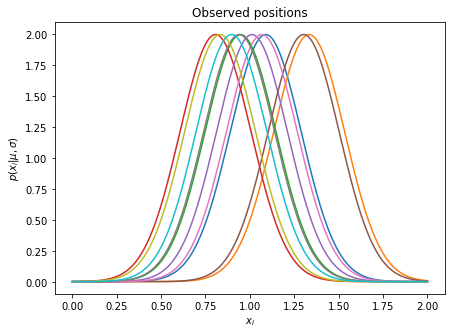

In [2]:
gauss = norm(loc=1, scale=0.2)   #gaussian from which I extract the observed values  
N_obs = 10                       #number of observations
np.random.seed(28)
x = gauss.rvs(N_obs)             #values of the observations

x_axis = np.linspace(0,2, 10000) 

L = 1     #Likelihood function (initialised to 1 since I have to multiply stuff here)
ln_L = 0  #log_Likelihood function (initialised to 0 since I have to sum stuff here)

fig, ax = plt.subplots(1,1,figsize=(7,5))

for i in range(N_obs):
    gauss_measure = norm(loc = x[i], scale = 0.2) #in this vector I store the single gaussians with mean = extracted points 
                                                  #and sigma = 0.2
    plt.plot(x_axis, gauss_measure.pdf(x_axis))
    
    L = L*gauss_measure.pdf(x_axis)
    ln_L += gauss_measure.logpdf(x_axis)

ax.set_title('Observed positions')
ax.set_ylabel('$p(x_{i}|\mu, \sigma)$')
ax.set_xlabel('$x_i$')

Then we can plot the Likelihood and its logarithm, the orange vertical line is indicating the maximum of the Likelihood function.

The maximum of the Likelihood is found at mu = 1.02270
The mean of the sample is: 1.02271


Text(0.5, 0, '$\\mu$')

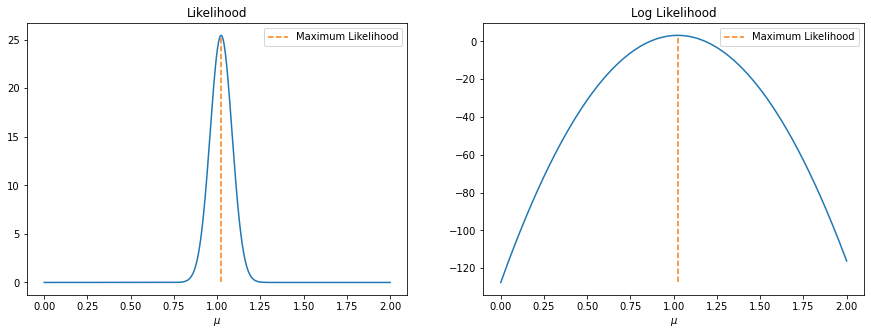

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x_axis, L)
ax[1].plot(x_axis, ln_L)

#finding the maximum of the Likelihood function
ind_max = np.argsort(L)[-1]
max_L = x_axis[ind_max]
print('The maximum of the Likelihood is found at mu = %.5f' %(max_L))

#evaluating the mean of the sample to compare it with the MLE e"empirical" estimator
mean_estimator = np.mean(x)
print('The mean of the sample is: %.5f' %mean_estimator)

ax[0].set_title('Likelihood')
ax[0].vlines(x=max_L, ymin = np.min(L), ymax = L[ind_max], ls='--', color = 'tab:orange', label = 'Maximum Likelihood')
ax[0].legend()
ax[0].set_xlabel('$\mu$')

ax[1].set_title('Log Likelihood')
ax[1].vlines(x=max_L, ymin = np.min(ln_L), ymax = ln_L[ind_max], ls='--', color = 'tab:orange', label = 'Maximum Likelihood')
ax[1].legend()
ax[1].set_xlabel('$\mu$')

We can compare the computed mean with the one we can find from the analytical formula. In fact, by maximising the likelihood given by the product of Gaussians with equal $\sigma$, what one gets is the well-known formula:

$$\hat{\mu} = \frac{1}{N}\sum_{i = 1}^{N}{x_{i}}$$

##### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

To evaluate the dispersion of the sample from the likelihood one can use the following formulae:

$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

That once applied analytically to a set of Gaussian distributions with homoscedastic errors gives:

$$\frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$

And therefore:

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

In [4]:
#evaluating sigma from the Likelihood

width = (x_axis[1:] - x_axis[:-1])[0]     #dx between each point of the x-grid
second_der = np.diff(ln_L, n=2)/width**2  #second derivative of the log_L

err = (-1*second_der[ind_max-1])**(-0.5) #sigma estimated from the likelihood
print('The error on the mean as estimated from the Likelihood is: %.5f' %err)

The error on the mean as estimated from the Likelihood is: 0.06325


In [5]:
#sigma analytically evaluated from theory
sigma_est = 0.2/np.sqrt(N_obs)
print('The error on the mean evaluated analitically: %.5f' %sigma_est)

The error on the mean evaluated analitically: 0.06325


The mean found numerically from MLE parameters and the one found analitically from the inital sample are the same at least considering the first 5 significant digits. The same happens also with the error.

The estimated mean, however, is different from the expected value of $\mu = 1$ since we have only 10 sample data, but if we increase this number we expect the mean to be closer to unity.

Here I compare the Likelihood with the resulting gaussian from the MLE distribution!

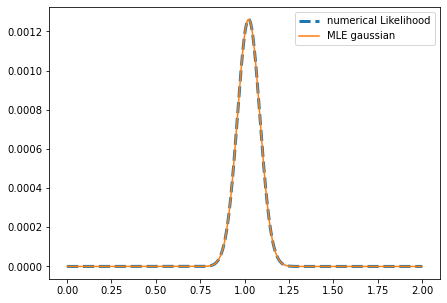

In [6]:
#comparing the likelihood with the resulting MLE distribution
fig, ax = plt.subplots(1,1, figsize=(7,5))

resulting_g = norm.pdf(x_axis, loc=max_L, scale = err) #gaussian generated from MLE parameters

#plotting normalising the curves dividing by the sum of the function vector
ax.plot(x_axis, L/np.sum(L), lw=3, label='numerical Likelihood', ls='--')  
ax.plot(x_axis, resulting_g/np.sum(resulting_g), label='MLE gaussian')
ax.legend()

### Gaussians with heterostedastic errors

##### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

What if we have different errors? Maybe we were observing the quasar from Earth with different seeing conditions and our measurments could all have different uncertainties.

Let's suppose that the errors are distributed as a Gaussian with $\mu = 0.2$ and $\sigma = 0.05$.

Text(0.5, 0, '$x_i$')

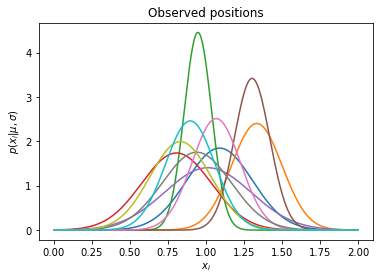

In [7]:
gauss_err = norm(loc=0.2, scale=0.05) #gaussian for uncertainties extraction
np.random.seed(72)
sigma = gauss_err.rvs(N_obs)          #errors for the observation

L_h = 1     #Likelihood
ln_L_h = 0  #log Likelihood

fig, ax = plt.subplots(1,1, figsize=(6,4))
for i in range(N_obs):
    gauss_measure = norm(loc = x[i], scale = sigma[i])
    ax.plot(x_axis, gauss_measure.pdf(x_axis))
    L_h = L_h *gauss_measure.pdf(x_axis)
    ln_L_h += gauss_measure.logpdf(x_axis)
    
ax.set_title('Observed positions')
ax.set_ylabel('$p(x_{i}|\mu, \sigma)$')
ax.set_xlabel('$x_i$')

The mean found by maximising the Likelihood function is: 1.04770


Text(0.5, 0, '$\\mu$')

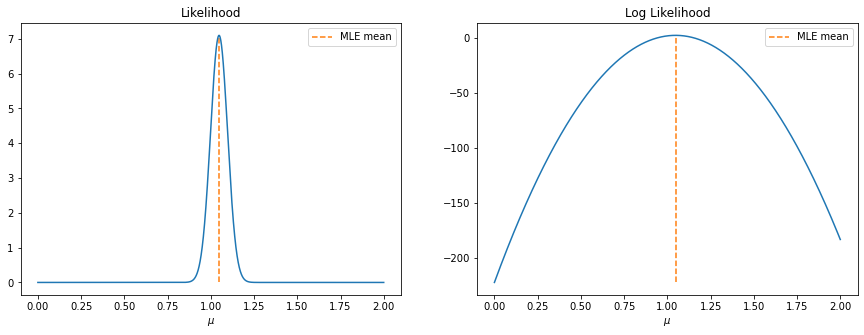

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

#maximising the Likelihood
ind_max_h = np.argsort(L_h)[-1]
max_L_h = x_axis[ind_max_h]
print('The mean found by maximising the Likelihood function is: %.5f' %max_L_h)

ax[0].plot(x_axis, L_h)
ax[0].set_title('Likelihood')
ax[0].vlines(x=max_L_h, ymin = np.min(L_h), ymax = L_h[ind_max_h], ls='--', color = 'tab:orange', label = 'MLE mean')
ax[0].legend()
ax[0].set_xlabel('$\mu$')

ax[1].plot(x_axis, ln_L_h)
ax[1].set_title('Log Likelihood')
ax[1].vlines(x=max_L_h, ymin = np.min(ln_L_h), ymax = ln_L_h[ind_max], ls='--', color = 'tab:orange', label = 'MLE mean')
ax[1].legend()
ax[1].set_xlabel('$\mu$')

Here again we could compare the mean and the dispersion values found from the computed Likelihood function with the ones found analytically from the maximisation of a Likelihood coming from a set of hetherostedastic normal distributions.

Analytically we find:

$$\hat \mu = \frac{\sum_{i=1}^N (x_i/\sigma_i^2)}{\sum_{i=1}^N (1/\sigma_i^2)}$$

$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}$$

In [9]:
#mean computed from the analytical formula
mean_h = np.sum(x/sigma**2)/np.sum(1/sigma**2) #weighted mean
print('The mean computed from the analytical formula is: %.5f' %mean_h)
print('The mean found from MLE is: %.5f' %max_L_h)

The mean computed from the analytical formula is: 1.04772
The mean found from MLE is: 1.04770


In [10]:
#evaluating the dispersion from the analytical formula
sigma_est = np.sum(1/sigma**2)**(-0.5)

#evaluating the error on the mean from the computed Likelihood
width = (x_axis[1:] - x_axis[:-1])[0]
second_der_h = np.diff(ln_L_h, n=2)/width**2  #second derivative of the log_L

mean_err_h = (-1*second_der_h[ind_max_h-1])**(-0.5) #error on the mean estimated from the likelihood
print('The error evaluated from the computed Likelihood is: %.7f' %mean_err_h)

print('The error calculated from the analytical formula is: %.7f' %sigma_est)

The error evaluated from the computed Likelihood is: 0.0494336
The error calculated from the analytical formula is: 0.0494336


### Bayesian method

Let's try to solve the first part of the problem supposing we are in a Bayesian framework. We want to know the value of $\mu$ knowing that the prior $p(\mu) = \mathcal{N}(\mu_{0}=1,\sigma_{0}=0.5)$ and assuming a homoscedastic Gaussian as a model for our data with $\sigma=0.2$.

Solving the problem analytically what we should have is:

$$\mathcal{L} = p( \{x_i\} |\mu, \sigma) = \prod_{i=1}^{N} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)$$

$$p(\mu | \mu_{0}, \sigma_{0}) = \frac{1}{\sqrt{2 \pi} \sigma_{0}} \exp \left(-\frac{(\mu-\mu_{0})^2}{2\sigma_{0}^2}\right) $$

Therefore the unnormalized posterior distribution is going to be:

$$p(\mu|\{x_i\}, \sigma, I) = \frac{1}{\sqrt{2 \pi} \sigma_{0}} \exp \left(-\frac{(\mu-\mu_{0})^2}{2\sigma_{0}^2}\right) \prod_{i=1}^{N} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right) $$ 

And the logarithm of the posterior:

$$\ln(p(\mu|\{x_i\}, \sigma, I)) = \mathrm{const} - \frac{(\mu-\mu_{0})^2}{2\sigma_{0}^2} - \sum_{i=1}^{N} \frac{(x_i-\mu)^2}{2\sigma^2} $$

And we can find the estimator of the mean by maximising the log posterior distribution, so that we would get:

$$ \hat{\mu} = \frac{\frac{\mu_0}{\sigma_{0}^2}+ \sum_{i=1}^{N} \frac{x_i}{\sigma^2}}{\frac{1}{\sigma_{0}^2}+ \frac{N}{\sigma^2}} $$

And from the second derivative of the log posterior we can evaluate the uncertainty over the mean:

$$ \hat{\sigma}_{\hat{\mu}} = \left( \frac{1}{\sigma_{0}^2} + \frac{N}{\sigma^2} \right) ^{-1/2} $$

The maximum of the posterior distribution is found at: 1.0227


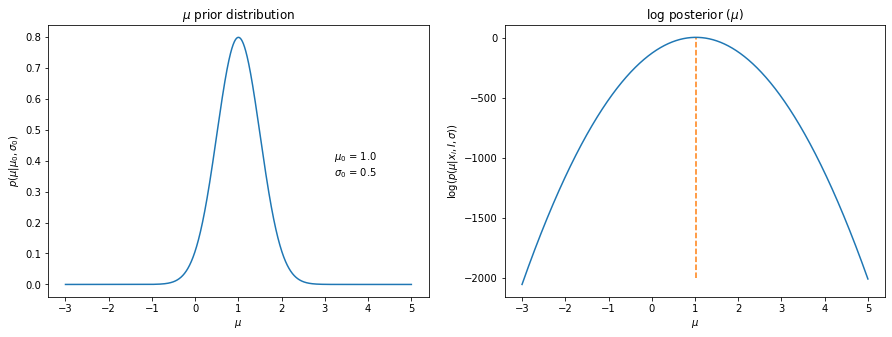

In [11]:
# Bayesian 


#gaussian prior
def prior_g(mu, mu_0, sigma_0):
    return norm(loc = mu_0, scale = sigma_0).pdf(mu)

def log_prior_g(mu, mu_0, sigma_0):
    return norm(mu_0, sigma_0).logpdf(mu)

def likelihood(mu, x, sigma):
    like = []
    for j in range(len(mu)):
        likel=[]
        for i in range(len(x)):
            likel.append(1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x[i]-mu[j])**2)/(2*sigma**2)))
        likel = np.array(likel)
        like.append(np.prod(likel))
        
    return like

def loglikelihood(mu, x, sigma):
    log = []
    for j in range(len(mu)):
        logl = []
        for i in range(len(x)):
            logl.append(np.log(1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x[i]-mu[j])**2)/(2*sigma**2))))
        logl = np.array(logl)
        log.append(np.sum(logl))
    return log

def posterior(mu, x, sigma, mu_0, sigma_0):
    post = likelihood(mu, x, sigma)*prior_g(mu, mu_0, sigma_0)
    return post

def log_posterior(mu, x , sigma, mu_0, sigma_0):
    return loglikelihood(mu, x, sigma) + log_prior_g(mu, mu_0, sigma_0)

#known parameters
mu_0 = 1
sigma_0 = 0.5
sigma = 0.2

#mu gaussian prior
mu_range = np.linspace(-3,5, 3000)
prior_m = prior_g(mu_range, mu_0 , sigma_0)

#log posterior
log_post = log_posterior(mu_range, x, 0.2, mu_0, sigma_0)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(mu_range, prior_m)
ax[0].set_xlabel('$\mu$')
ax[0].set_ylabel('$p(\mu|\mu_0, \sigma_0)$')
ax[0].set_title('$\mu$ prior distribution')
ax[0].text( 3.2, 0.35, '$\mu_0$ = %.1f \n$\sigma_0$ = %.1f' %(mu_0, sigma_0))

ax[1].plot(mu_range, log_post)
ax[1].set_xlabel('$\mu$')
ax[1].set_ylabel('$\log(p(\mu|{x_i}, I, \sigma))$')
ax[1].set_title('log posterior ($\mu$)')

#taking the maximum of the log_posterior
maxp = np.argsort(log_post)[-1]
mu_bestest = mu_range[maxp]

ax[1].vlines(mu_bestest, -2000,0, ls='--', color='tab:orange')

print('The maximum of the posterior distribution is found at: %.4f' %mu_bestest)

In [12]:
#mu uncertainty from the second derivative of the log_posterior
width = (mu_range[1:] - mu_range[:-1])[0]    
second_der = np.diff(log_post, n=2)/width**2 
err_b = np.sqrt(-1/second_der)[maxp-1]

In [13]:
#from analytical Bayesian methods
mu_an = ((mu_0/sigma_0**2) + np.sum(x)/sigma**2)/(1/sigma_0**2 + N_obs/sigma**2)
print('The analytical mean is: %.4f' %mu_an)
print('The MAP mean is: %.4f' %mu_bestest)

err_an = (1/sigma_0**2 + N_obs/sigma**2)**(-1/2)
print('\nThe analytical uncertainty is: %.4f' %err_an)
print('The MAP uncertainty is: %.4f' %err_b)


The analytical mean is: 1.0223
The MAP mean is: 1.0227

The analytical uncertainty is: 0.0627
The MAP uncertainty is: 0.0627


### emcee

Here I try to do the exact same thing but using a MC technique.

In [14]:
import emcee

#run parameters
ndim=1
nwalk = 10
nsteps=5000

#starting guesses extracted from a Gaussian(1, 0.5) which is actually the prior on mu
starting_guesses = np.zeros([nwalk, ndim])
for i in range(nwalk):
    starting_guesses[i] = norm(1, 0.5).rvs()

#running MCMC
sampler = emcee.EnsembleSampler(nwalk, ndim, log_posterior, args=[x, sigma, mu_0, sigma_0])

sampler.run_mcmc(starting_guesses, nsteps)

#chains and corrections
chains = sampler.get_chain()
print('Dimension of the chains: ', chains.shape)

tau = sampler.get_autocorr_time()[0]
print('\nThe autocorrelation time is: ', tau)

flat_chain = sampler.get_chain(discard=500, thin=int(tau), flat=True)
print('\nDimension of the chain after thinning, correcting for burn-in and "flattening": ', flat_chain.shape)

Dimension of the chains:  (5000, 10, 1)

The autocorrelation time is:  28.108548444538524

Dimension of the chain after thinning, correcting for burn-in and "flattening":  (1600, 1)


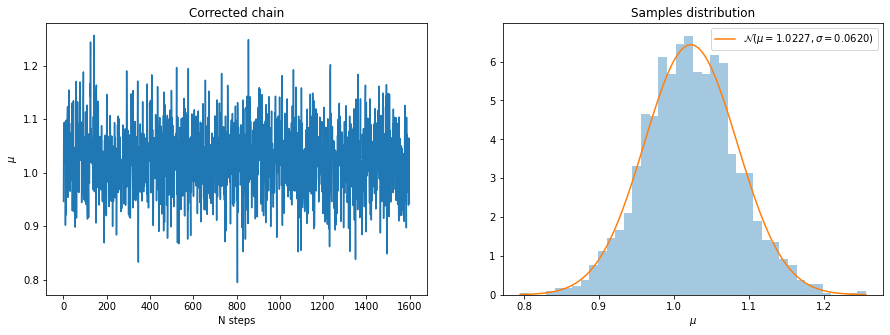

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(flat_chain, color='tab:blue')
ax[0].set_ylabel('$\mu$')
ax[0].set_xlabel('N steps')
ax[0].set_title('Corrected chain')

mean_ch = np.mean(flat_chain)
std = np.std(flat_chain)

x_grid = np.linspace(np.min(flat_chain), np.max(flat_chain), 100)
ax[1].hist(flat_chain, bins=40, alpha=0.4, density=True)
ax[1].plot(x_grid, norm(mean_ch, std).pdf(x_grid), label = r'$\mathcal{N}(\mu = %.4f, \sigma = %.4f)$' %(mean_ch, std))
ax[1].set_xlabel('$\mu$')
ax[1].set_title('Samples distribution')
ax[1].legend()

After correcting the chain in order to discard the initial burn-in points, thinning using the auto-correlation time, we are left with 1600 samples that are clearly distributed as a Gaussian. We actually expected that from theory since both the Likelihood function and the prior on $\mu$ are normal functions and the product of two Gaussians is still a Gaussian.

In particular we see how both the mean and the std of the posterior Gaussian distribution are close to the expected analytical result ($\mu_{exp} = 1.0223$, $\sigma_{exp} = 0.0627$). However, MC requires more time and the results are slightly worse when compared to the MAP method above, but it can be very useful when we have more parameters and non-gaussian distributions.